# Text Emotion Classfication Model


In [85]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
train = pd.read_csv(r"C:\Users\AMAN SHARMA\OneDrive\Desktop\training.csv")
test = pd.read_csv(r"C:\Users\AMAN SHARMA\OneDrive\Desktop\test.csv")
validation = pd.read_csv(r"C:\Users\AMAN SHARMA\OneDrive\Desktop\validation.csv")

In [89]:
train.shape,test.shape,validation.shape

((16000, 2), (2000, 2), (2000, 2))

Mapping description to the data for the label

In [92]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

train['description'] = train['label'].map(labels_dict )

In [94]:
train['description'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: description, dtype: int64

<Axes: >

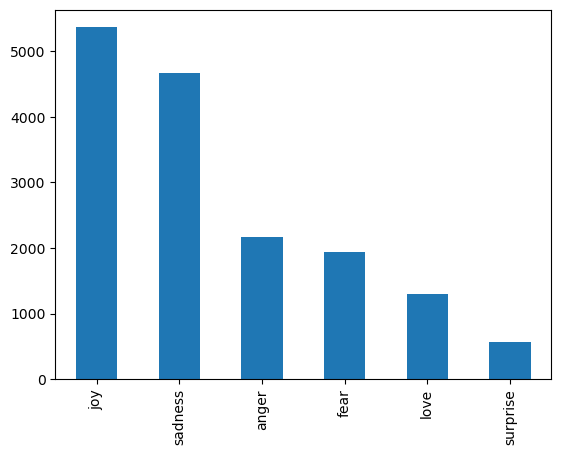

In [96]:
train['description'].value_counts().plot.bar()

Splitting the dataset into train and test 

In [99]:
x_train = train.iloc[:,0].values
y_train = train.iloc[:,1].values
x_test = test.iloc[:,0].values
y_test = test.iloc[:,1].values

Shape of the train and test data

In [102]:
x_train.shape, x_test.shape

((16000,), (2000,))

In [104]:
x_train

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      dtype=object)

In [106]:
y_train

array([0, 0, 3, ..., 1, 3, 0], dtype=int64)

TextVectorization: Converting text into vector

In [109]:
tfidf = TfidfVectorizer()

x_train_vect = tfidf.fit_transform(x_train)  # converting the text into numbers using tf-idf
x_train_vect.shape

(16000, 15186)

In [111]:
x_train_vect

<16000x15186 sparse matrix of type '<class 'numpy.float64'>'
	with 249634 stored elements in Compressed Sparse Row format>

In [113]:
type(x_train_vect)

scipy.sparse._csr.csr_matrix

# Implementing SupportVectorMachine

In [118]:
from sklearn import svm

In [122]:
svc = svm.SVC()
svc.fit(x_train_vect,y_train)

SVC()

In [142]:
x_test_vec = tfidf.transform(x_test)

In [146]:
y_pred = svc.predict(x_test_vec)

In [147]:
y_pred

array([0, 0, 0, ..., 1, 1, 4], dtype=int64)

In [150]:
y_test

array([0, 0, 0, ..., 1, 1, 4], dtype=int64)

In [152]:
from sklearn.metrics import accuracy_score, classification_report

In [154]:
accuracy_score(y_pred,y_test)

0.8545

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       581
           1       0.81      0.96      0.88       695
           2       0.88      0.53      0.66       159
           3       0.91      0.79      0.84       275
           4       0.87      0.79      0.83       224
           5       0.86      0.45      0.59        66

    accuracy                           0.85      2000
   macro avg       0.87      0.74      0.78      2000
weighted avg       0.86      0.85      0.85      2000



Applying different SVM Kernel

In [239]:
svc1 = svm.SVC(kernel='linear', C=1, gamma = 0.1, random_state=2)
svc2 = svm.SVC(kernel='poly', C=1, degree=5, gamma = 0.1, random_state=2)
svc3 = svm.SVC(kernel='rbf', C=1, gamma = 0.1, random_state=2)
svc4 = svm.SVC(kernel='sigmoid',C=1,gamma=0.1,random_state=2)

# paramters: C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, probability=False, shrinking=True, and tol=1e-3

In [241]:
svc1.fit(x_train_vect,y_train)
svc2.fit(x_train_vect,y_train)
svc3.fit(x_train_vect,y_train)
svc4.fit(x_train_vect,y_train)

SVC(C=1, gamma=0.1, kernel='sigmoid', random_state=2)

# Performance comparision among different SVM kernel 

Using SVM Linear Kernel

In [323]:
y_pred = svc1.predict(x_test_vec)

In [324]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_score(y_pred,y_test)

0.8855

In [347]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       581
           1       0.88      0.95      0.91       695
           2       0.82      0.67      0.74       159
           3       0.89      0.88      0.88       275
           4       0.85      0.85      0.85       224
           5       0.76      0.56      0.64        66

    accuracy                           0.89      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.88      0.89      0.88      2000



In [326]:
correct = 0
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        correct += 1
    else:
        continue
correct

1771

In [327]:
total = 2000
accuracy = (correct/total)*100
accuracy

88.55

In [328]:
svc1.classes_

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [329]:
predictions = svc1.predict(x_test_vec)
cm = confusion_matrix(y_test, predictions, labels=svc1.classes_)

In [333]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc1.classes_)

# Confusion Matrix

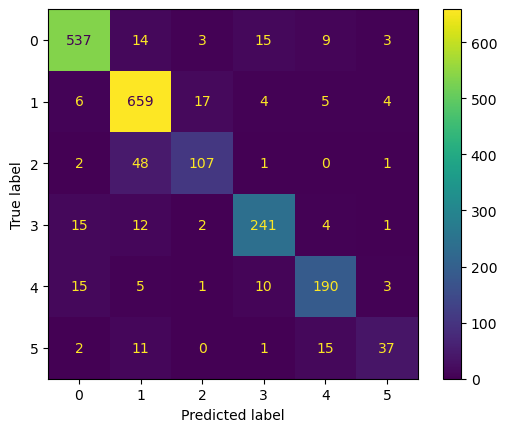

In [337]:
disp.plot()

In [343]:
d = list(set(train['label']))
d

[0, 1, 2, 3, 4, 5]

In [345]:
for i in range(cm.shape[0]):
    tp = cm[i,i]
    fn = sum(cm[i,:])- tp
    fp = sum(cm[:,i])- tp
    tn = total-fp-fn-tp
    class_acc = (tp+tn)/total
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print(f"The classwise accuracy of {d[i]} = {class_acc}, precision = {precision}, recall = {recall}, f1 = {f1}")

The classwise accuracy of 0 = 0.958, precision = 0.9306759098786829, recall = 0.9242685025817556, f1 = 0.9274611398963731
The classwise accuracy of 1 = 0.937, precision = 0.8798397863818425, recall = 0.9482014388489208, f1 = 0.9127423822714682
The classwise accuracy of 2 = 0.9625, precision = 0.823076923076923, recall = 0.6729559748427673, f1 = 0.740484429065744
The classwise accuracy of 3 = 0.9675, precision = 0.8860294117647058, recall = 0.8763636363636363, f1 = 0.8811700182815356
The classwise accuracy of 4 = 0.9665, precision = 0.852017937219731, recall = 0.8482142857142857, f1 = 0.8501118568232662
The classwise accuracy of 5 = 0.9795, precision = 0.7551020408163265, recall = 0.5606060606060606, f1 = 0.6434782608695652


Model Dumping

In [354]:
import pickle
pickle.dump(svc1, open('emotionclassifier.pkl','wb'))   

Using SVM Polynomial Kernel

In [251]:
y_pred = svc2.predict(x_test_vec)

In [252]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.3475

Using SVM RBF (radial basis function) Kernel

In [256]:
y_pred = svc3.predict(x_test_vec)

In [257]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.755

Using SVM Sigmoid kernel

In [261]:
y_pred = svc4.predict(x_test_vec)

In [262]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.639

Among all SVM kernel, Linear kernel giving the best performance!

# Prediction for Input text

In [265]:
x_test[0]

'im feeling rather rotten so im not very ambitious right now'

Prediction By SVM Linear Kernel

In [267]:
input_text = x_test[0]
input_seque = tfidf.transform([input_text]) 

In [270]:
prediction = svc1.predict(input_seque)
print(labels_dict[prediction[0]])

sadness


Prediction By SVM Poly Kernel

In [273]:
prediction = svc2.predict(input_seque)
print(labels_dict[prediction[0]])

joy


Prediction By SVM RBF Kernel

In [276]:
prediction = svc3.predict(input_seque)
print(labels_dict[prediction[0]])

sadness


# Implementing Feed Forward Neural Network

Importing Necessary Libraries

In [243]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

Loading Emotion dataset

In [246]:
data = pd.read_csv(r"C:\Users\AMAN SHARMA\OneDrive\Desktop\train.txt", sep=';')
data.columns = ["Text", "Emotions"]
data.head(5)

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [248]:
data.shape

(15999, 2)

In [250]:
text = data['Text'].tolist()
labels = data['Emotions'].tolist()

In [252]:
text[:15]

['i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirsty',
 'i have immense sympath

Tokenize the text data

In [255]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

In [257]:
len(tokenizer.index_word)

15212

In [259]:
sequences = tokenizer.texts_to_sequences(text)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences,maxlen=max_length)

In [261]:
padded_sequences

array([[   0,    0,    0, ...,    3,   21, 1254],
       [   0,    0,    0, ...,    2,  494,  437],
       [   0,    0,    0, ...,   29,    5, 3496],
       ...,
       [   0,    0,    0, ...,    3,  101, 1331],
       [   0,    0,    0, ...,  339,    8,   42],
       [   0,    0,    0, ...,   25, 3585,   12]])

Label Encoding

In [264]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [266]:
labels

array([4, 0, 3, ..., 2, 0, 4], dtype=int64)

Onehot Encode labels

In [269]:
import keras

In [271]:
one_hot_labels = keras.utils.to_categorical(labels)

Splitting the datasets into training and testing datasets

In [274]:
x_train,x_test,y_train,y_test = train_test_split(padded_sequences,one_hot_labels,test_size=0.2)

In [276]:
x_test.shape

(3200, 66)

Definging the model

In [279]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=len(one_hot_labels[0]),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10,batch_size=32, validation_data=(x_test,y_test))

Epoch 1/10
400/400 [==============================] - 25s 59ms/step - loss: 1.3248 - accuracy: 0.4921 - val_loss: 0.8491 - val_accuracy: 0.7197
Epoch 2/10
400/400 [==============================] - 24s 59ms/step - loss: 0.3348 - accuracy: 0.8960 - val_loss: 0.5694 - val_accuracy: 0.8128
Epoch 3/10
400/400 [==============================] - 24s 59ms/step - loss: 0.0611 - accuracy: 0.9855 - val_loss: 0.6172 - val_accuracy: 0.8203
Epoch 4/10
400/400 [==============================] - 23s 58ms/step - loss: 0.0272 - accuracy: 0.9942 - val_loss: 0.6241 - val_accuracy: 0.8200
Epoch 5/10
400/400 [==============================] - 24s 59ms/step - loss: 0.0176 - accuracy: 0.9961 - val_loss: 0.6369 - val_accuracy: 0.8225
Epoch 6/10
400/400 [==============================] - 24s 61ms/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.6779 - val_accuracy: 0.8184
Epoch 7/10
400/400 [==============================] - 24s 59ms/step - loss: 0.0137 - accuracy: 0.9970 - val_loss: 0.6701 - val_accuracy:

In [281]:
x_test.shape

(3200, 66)

In [283]:
np.expand_dims(x_test[0],axis=0)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          46,    8,    1,   71,    2,  167,    9,  307,   18,    1,  116,
        2926,   59,    7,  395,    4,    7,  308,   33,    1, 1777,  141]])

In [285]:
np.argmax(model.predict(np.expand_dims(x_test[1],axis=0)))

1/1 [==============================] - 0s 99ms/step


2

In [287]:
y_pred = []
for i in range(x_test.shape[0]):
    prediction = np.argmax(model.predict(np.expand_dims(x_test[i],axis=0)))
    y_pred.append(prediction)

1/1 [==============================] - 0s 22ms/step


In [289]:
y_t = []
for i in range(y_test.shape[0]):
    yt = np.argmax(y_test[i])
    y_t.append(yt)

In [291]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_t)

0.8153125

# Predicting Input Text

In [342]:
input_text = "she didn't come today because she lost her dog yesterday"

input_seq = tokenizer.texts_to_sequences([input_text])
pad_input_seq = pad_sequences(input_seq,maxlen=max_length)

prediction = model.predict(pad_input_seq)

1/1 [==============================] - 0s 35ms/step


In [344]:
pad_input_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   97,  181,  121,   36,   97,  269,   67, 1435,  674]])

In [346]:
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label[0])

sadness
